# Sample Images

This notebook will generate a few sample blurred images for use in the write-up.

In [10]:
import cv2
import matplotlib.pyplot as plt

In [11]:
image_path='data/blur_images'

In [12]:
def gen_blurs(original_path, blurs, labels, resize=True):
    assert(len(blurs) == len(labels))
    
    # Load an unmodified cropped image
    image = cv2.imread(original_path)
    blurred_images = []
    for i in range(len(blurs)):
        # apply blur if valid blur window size
        if blurs[i] > 0:
            tmp_image = cv2.blur(image, (blurs[i], blurs[i]))
        else:
            tmp_image = image
            
        # apply resizing to match model input image
        if resize:
            tmp_image = cv2.resize(tmp_image, (224, 224))
            
        # change channel ordering to support matplotlib plotting
        tmp_image = cv2.cvtColor(tmp_image, cv2.COLOR_BGR2RGB)
        blurred_images.append((labels[i], tmp_image))
    
    return blurred_images

In [24]:
def show_blurs(blurs, blurred_images):
    # matplotlib stuff to plot multiple images
    fig, axs = plt.subplots(1, len(blurs), figsize=(32, 32))
    
    for i in range(len(blurs)):
        axs[i].imshow(blurred_images[i][1])
        axs[i].set_title(blurred_images[i][0])
        axs[i].axis('off')
    
    plt.show()

In [29]:
def save_individual_blurs(blurs, blurred_images):
    for i in range(len(blurs)):
        plt.imshow(blurred_images[i][1])
        plt.title(blurred_images[i][0])
        plt.axis('off')
        plt.savefig(image_path + '/blur_samples_' + str(blurs[i]) + '.svg')

In [30]:
def save_blurs(blurs, blurred_images):
    # matplotlib stuff to plot multiple images
    fig, axs = plt.subplots(1, len(blurs), figsize=(32, 32))
    
    for i in range(len(blurs)):
        axs[i].imshow(blurred_images[i][1])
        axs[i].set_title(blurred_images[i][0])
        axs[i].axis('off')
    
    plt.savefig(image_path + '/blur_samples_combined.svg')

In [33]:
list_mm = [0, .01, .05, .1]
list_labels = [
    'Original (No Blurring)',
    'Blurred (0.01 Millimeters)',
    'Blurred (0.05 Millimeters)',
    'Blurred (0.1 Millimeters)',
]
avg_pixels_per_image = 893
avg_mm_per_image = 6
mm_to_pixel = avg_pixels_per_image/avg_mm_per_image
list_pixels=[int(mm * mm_to_pixel) for mm in list_mm]

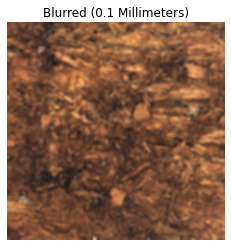

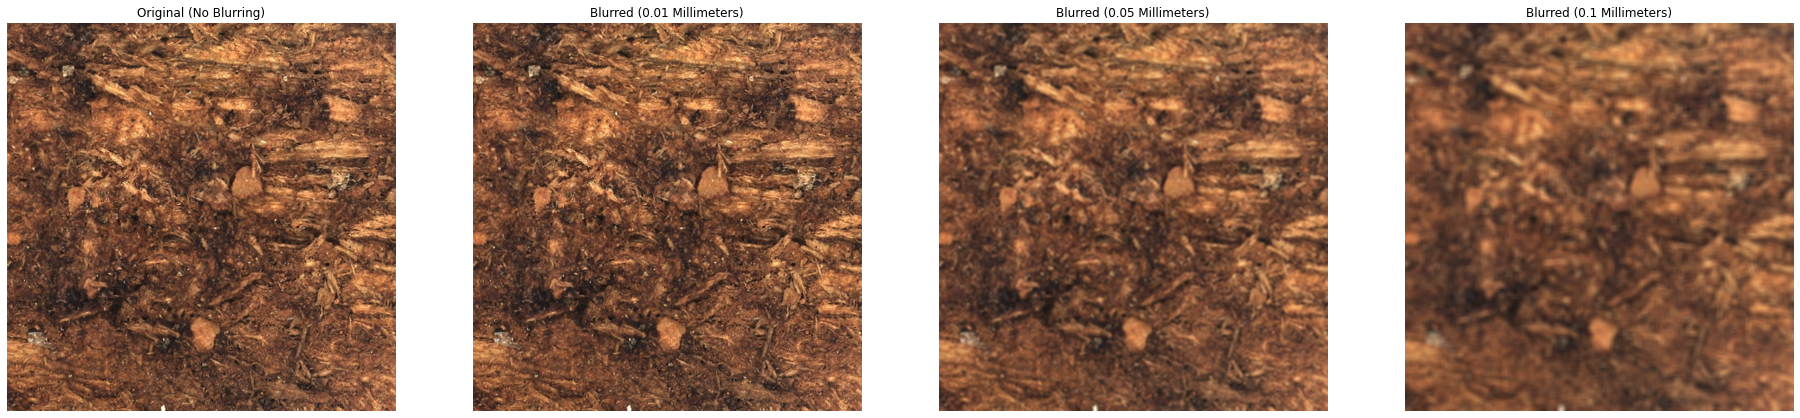

In [37]:
blurred_images = gen_blurs('data/Images/Cou1Uselarge1.jpg', list_pixels, list_labels, resize=False)
save_individual_blurs(list_pixels, blurred_images)
save_blurs(list_pixels, blurred_images)
#show_blurs(list_pixels, blurred_images)